Module 1 Project

Part 1: Cleaning the Data

In [1]:
#import all libararies needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data file
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head() #quick view of data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info() #get information

#21 columns
#21597 rows (entries)
#nulls in waterfront, view, yr_renovated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe() #show standard measures for all integer variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.sqft_basement.value_counts() #checking out because listed as object.  Shows 454 values as '?'

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
1135.0        1
1880.0        1
1008.0        1
475.0         1
2390.0        1
3000.0        1
506.0         1
1798.0        1
906.0         1
784.0         1
792.0         1
2190.0        1
666.0         1
556.0         1
861.0         1
875.0         1
2400.0        1
2250.0        1
2050.0        1
176.0         1
1548.0        1
704.0         1
1024.0        1
935.0         1
1245.0        1
1284.0        1
652.0         1
1920.0        1
516.0         1
172.0         1
Name: sqft_basement, Len

In [7]:
df.date.value_counts() #looks ok...all look like dates

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/22/2015     121
4/14/2015     121
7/9/2014      121
4/28/2015     121
6/24/2014     119
4/21/2015     119
10/28/2014    117
8/26/2014     117
7/14/2014     116
5/20/2014     116
7/1/2014      115
8/20/2014     114
4/29/2015     113
6/17/2014     113
7/29/2014     112
4/8/2015      112
7/16/2014     111
5/28/2014     111
4/23/2015     110
8/5/2014      109
8/25/2014     109
3/27/2015     109
8/11/2014     107
6/20/2014     107
             ... 
5/9/2015        3
2/21/2015       3
7/6/2014        3
8/9/2014        2
12/27/2014      2
12/7/2014       2
8/24/2014       2
2/1/2015        2
9/7/2014        2
5/10/2015       2
11/28/2014      2
7/4/2014        2
12/21/2014      2
5/11/2014       2
11/15/2014      2
10/11/2014      2
7/27/2014       1
8/30/2014       1
5/17/2014       1
11/2/2014       1
1/10/2015       1
2/15/2015       1
1/17/2015       1
1/31/2015       1
5/27/2015 

Based on initial analysis, need to take the following steps:

1) Take care of null values for: waterfront, view, yr_renovated

2) Take care of '?' values in sqft_basement

In [8]:
df.isna().sum() #checking for null values to ensure didn't miss any

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

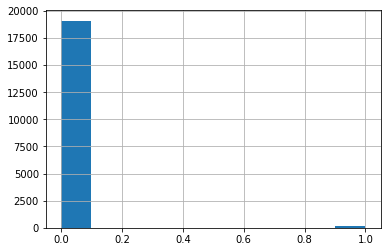

In [9]:
#take care of waterfront nulls
df.waterfront.hist() #histogram of non-null values

df.waterfront.value_counts()

In [10]:
#appears majority is at 0
#get percent that is 0
total_waterfront_values = len(df.waterfront)
zero_waterfront_values = df.waterfront.value_counts()[0]

zero_waterfront_percent = zero_waterfront_values / total_waterfront_values * 100
print('Percent 0 is: ', round(zero_waterfront_percent, 2),'%')

Percent 0 is:  88.32 %


In [11]:
#null value percent of total
null_waterfront_values = df.waterfront.isna().sum()

null_waterfront_percent = null_waterfront_values / total_waterfront_values * 100
print('Null is: ', round(null_waterfront_percent, 2),'%')

Null is:  11.0 %


In [12]:
#choosing to remove waterfront as a column because 88.32% of values are 0 and 11.0% values are null
#and therefore waterfront will not be a helpful predictor of house price
df_new = df.copy()
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
del df_new['waterfront']
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

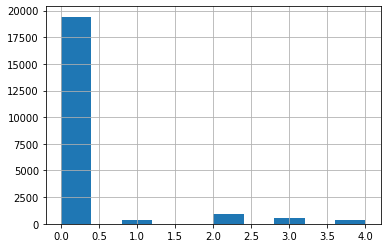

In [14]:
#take care of view nulls from df_new
df_new.view.hist() #histogram of non-null values

df_new.view.value_counts()

In [15]:
#null value percent of total
total_view_values = len(df_new.view)
null_view_values = df_new.view.isna().sum()
null_view_percent = null_view_values / total_view_values * 100
print('Null is: ', round(null_view_percent, 2),'%')

Null is:  0.29 %


In [16]:
#Since less than 1% null, going to replace with mode value
#View appears to be a category variable although presents as integer
#Only 3 possible values: 0, 1, 2, 3, 4

view_mode = df_new.view.mode()
df_new['view'].fillna(view_mode[0], inplace = True)
print(df_new.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

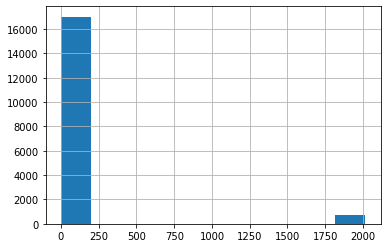

In [17]:
#take care of yr_renovated nulls from df_new
df_new.yr_renovated.hist() #histogram of non-null values

df_new.yr_renovated.value_counts()

In [18]:
#null value percent of total
total_yr_renovated_values = len(df_new.yr_renovated)
null_yr_renovated_values = df_new.yr_renovated.isna().sum()
null_yr_renovated_percent = null_yr_renovated_values / total_yr_renovated_values * 100
print('Null is: ', round(null_yr_renovated_percent, 2),'%')

Null is:  17.79 %


In [19]:
#appears majority is at 0
#get percent that is 0
zero_yr_renovated_values = df.yr_renovated.value_counts()[0]

zero_yr_renovated_percent = zero_yr_renovated_values / total_yr_renovated_values * 100
print('Percent 0 is: ', round(zero_yr_renovated_percent, 2),'%')

Percent 0 is:  78.77 %


In [20]:
#0 must mean that these houses were not renovated.  Can assume null values also mean house was not renovated.
#change null values to 0.0
#Note that for yr_renovated 0.0 means that house was not renovated

df_new['yr_renovated'].fillna(0.0, inplace = True)
print(df_new.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [21]:
#take care of sqft_basement '?'
df.sqft_basement.value_counts() #checking out because listed as object.  Shows 454 values as '?'

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
1135.0        1
1880.0        1
1008.0        1
475.0         1
2390.0        1
3000.0        1
506.0         1
1798.0        1
906.0         1
784.0         1
792.0         1
2190.0        1
666.0         1
556.0         1
861.0         1
875.0         1
2400.0        1
2250.0        1
2050.0        1
176.0         1
1548.0        1
704.0         1
1024.0        1
935.0         1
1245.0        1
1284.0        1
652.0         1
1920.0        1
516.0         1
172.0         1
Name: sqft_basement, Len

In [28]:
#check for % that has '?'
total_sqft_basement_values = len(df_new.sqft_basement)
null_sqft_basement_values = df_new.sqft_basement.value_counts()[1]

null_sqft_basement_percent = null_sqft_basement_values / total_sqft_basement_values * 100
print('Null is: ', round(null_sqft_basement_percent, 2),'%')

Null is:  2.1 %


In [36]:
#since only 2.1%, assume that ? means no basement and replace with 0
df_new['sqft_basement'].replace('?', 0.0, inplace = True)
df_new.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Part 2: Data Exploration (EDA)

Your project contains at least 4 meaningful data visualizations, with corresponding interpretations.
All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)

You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.

Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.

Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.

Part 3: Modeling (Multi-linear)

Your model should not include any predictors with p-values greater than .05.

Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.

Level Up: Whenever necessary, you briefly explain the changes made from one iteration to the next, and why you made these choices.

You provide at least 1 paragraph explaining your final model.

You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.